# 모델링 - baseline model  
  
- DI/IVF별 데이터 분리 + adaboost
- 언더샘플링 수행. 데이터 학습 비율 설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Commit_test_folder/LGAimers-06-2/src

/content/drive/MyDrive/Commit_test_folder/LGAimers-06-2/src


In [3]:
import pandas as pd
import numpy as np
import lgAimersDPP as dpp

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
pd.set_option('display.max_columns',None) # 전체 열 출력하기
dpp

<module 'lgAimersDPP' from '/content/drive/MyDrive/Commit_test_folder/LGAimers-06-2/src/lgAimersDPP.py'>

In [5]:
train = pd.read_csv('data/train.csv')
train = dpp.dpp(train)
print(train.shape)
train.head()

(256351, 81)


,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,불명확 불임 원인,불임 원인 - 난관 질환,불임 원인 - 남성 요인,불임 원인 - 배란 장애,불임 원인 - 여성 요인,불임 원인 - 자궁경부 문제,불임 원인 - 자궁내막증,불임 원인 - 정자 농도,불임 원인 - 정자 면역학적 요인,불임 원인 - 정자 운동성,불임 원인 - 정자 형태,총 시술 횟수,클리닉 내 총 시술 횟수,IVF 시술 횟수,DI 시술 횟수,총 임신 횟수,IVF 임신 횟수,DI 임신 횟수,총 출산 횟수,IVF 출산 횟수,DI 출산 횟수,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,기증자 정자와 혼합된 난자 수,난자 출처,정자 출처,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부,난자 나이,정자 나이,isIVF,isICSI,isIUI,isICI,isGIFT,isFER,isGenericDI,isIVI,isBLASTOCYST,isAH,isUnknown,기증용 배아,난자 저장용 배아,배아 저장용 배아,연구용 배아,현재 시술용 배아
0,1,-1.0,1,1,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,5.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,7.0,0.0,5.0,5.0,0.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,3.0,-1.0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,6,-1.0,1,0,-1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,0,6,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,-1.0,1,1,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,5.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,7.0,7.0,0.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,2.0,-1.0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,-1.0,1,1,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,4.0,0.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,0,2,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,-1.0,1,1,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,6.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,6.0,6.0,0.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,3.0,-1.0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [9]:
dinanlist = ['배란 유도 유형','단일 배아 이식 여부','착상 전 유전 검사 사용 여부','착상 전 유전 진단 사용 여부',
           '총 생성 배아 수','미세주입된 난자 수','미세주입에서 생성된 배아 수',
           '이식된 배아 수','미세주입 배아 이식 수','저장된 배아 수',
           '미세주입 후 저장된 배아 수','해동된 배아 수','해동 난자 수',
           '수집된 신선 난자 수','저장된 신선 난자 수','혼합된 난자 수',
           '파트너 정자와 혼합된 난자 수','기증자 정자와 혼합된 난자 수',
           '동결 배아 사용 여부','신선 배아 사용 여부','기증 배아 사용 여부','대리모 여부',
           'PGD 시술 여부','PGS 시술 여부','난자 채취 경과일','난자 해동 경과일',
           '난자 혼합 경과일','배아 이식 경과일','배아 해동 경과일']
traindi = train[train['시술 유형']==0].drop(dinanlist, axis=1)
trainivf = train[train['시술 유형']==1]

In [56]:
from matplotlib import pyplot as plt
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음.
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림.
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림.
    plt.plot([0, 1], [0, 1], 'k--', label='Random')

    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()


In [99]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

def adaboost(train, depth=30, ne=10, us=0.3):
  X_under, Y_under = RandomUnderSampler(sampling_strategy=us).fit_resample(train.drop(['임신 성공 여부'], axis=1), train['임신 성공 여부'])
  X_train, X_test, Y_train, Y_test = train_test_split(X_under, Y_under, test_size=0.2, random_state=42)
  print(Counter(Y_train))
  clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth),
                          n_estimators=ne, random_state=42)
  clf.fit(X_train, Y_train)
  print("훈련 세트의 정확도 : {:.2f}".format(clf.score(X_train, Y_train)))
  print("테스트 세트의 정확도 : {:.2f}".format(clf.score(X_test, Y_test)))
  print("ROC_AUC_SCORE: ",roc_auc_score(Y_test, clf.predict(X_test)))
  print("recall_score: ",recall_score(Y_test, clf.predict(X_test)))
  print("precision_score: ",precision_score(Y_test, clf.predict(X_test)))
  roc_curve_plot(Y_test, clf.predict_proba(X_test)[:, 1] )
  return clf


Counter({0: 2155, 1: 656})
훈련 세트의 정확도 : 0.94
테스트 세트의 정확도 : 0.71
ROC_AUC_SCORE:  0.5659112314574994
recall_score:  0.3161290322580645
precision_score:  0.32666666666666666


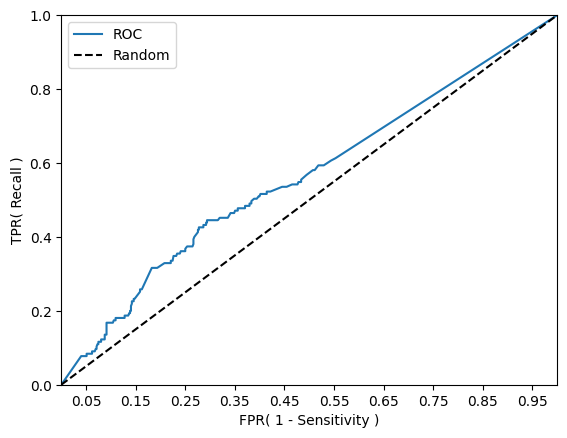

In [95]:
clfdi = adaboost(traindi)

Counter({0: 2155, 1: 656})
훈련 세트의 정확도 : 0.94
테스트 세트의 정확도 : 0.68
ROC_AUC_SCORE:  0.5448610784082882
recall_score:  0.3032258064516129
precision_score:  0.2865853658536585


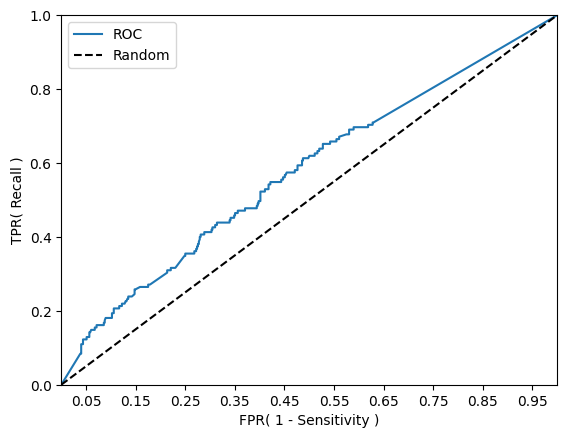

In [97]:
clfdi2 = adaboost(traindi, depth = 100, ne=100)


Counter({1: 52457, 0: 52210})
훈련 세트의 정확도 : 0.98
테스트 세트의 정확도 : 0.61
ROC_AUC_SCORE:  0.612095507713362
recall_score:  0.6351851851851852
precision_score:  0.6026354319180088


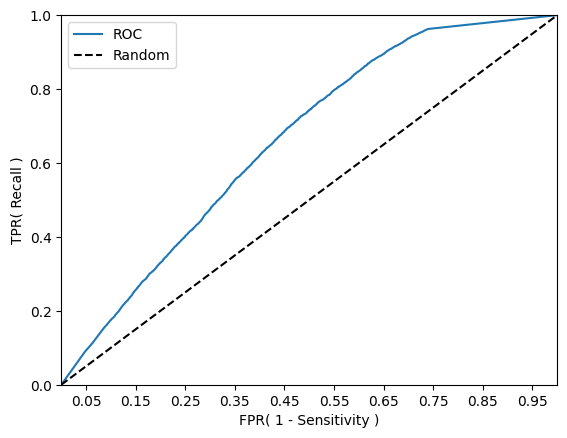

In [100]:
clfivf = adaboost(trainivf, depth=40, us=1)

Counter({0: 104657, 1: 52343})
훈련 세트의 정확도 : 0.98
테스트 세트의 정확도 : 0.64
ROC_AUC_SCORE:  0.5850867193634299
recall_score:  0.43552088113813675
precision_score:  0.4504746835443038


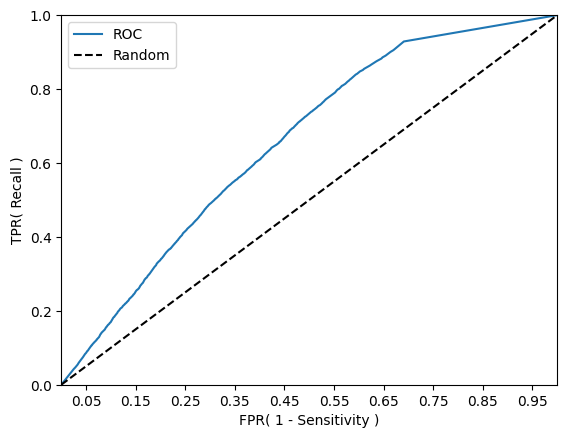

In [101]:
clfivf = adaboost(trainivf, depth=40, us=0.5)

Counter({1: 52457, 0: 52210})
훈련 세트의 정확도 : 0.98
테스트 세트의 정확도 : 0.61
ROC_AUC_SCORE:  0.6056847367230435
recall_score:  0.629783950617284
precision_score:  0.5962887200467563


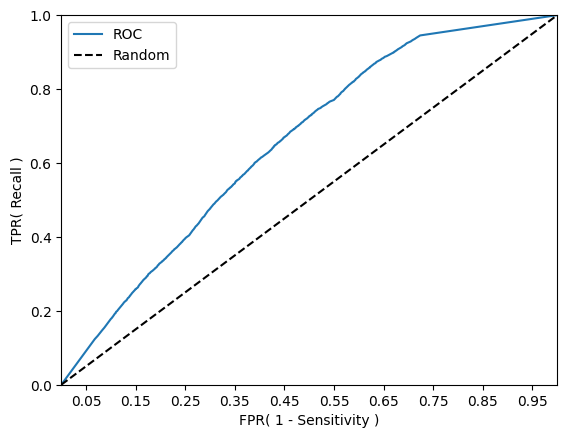

In [102]:
clfivf2 = adaboost(trainivf, depth=100, ne=10, us=1)

In [137]:
test = pd.read_csv('data/test.csv')
testdiid = test[test['시술 유형']=='DI']['ID'].to_numpy()
testivfid = test[test['시술 유형']=='IVF']['ID'].to_numpy()
#test 데이터 전처리
test = dpp.dpp(test)
print(test.shape)

(90067, 80)


In [111]:
testdi = test[test['시술 유형']==0].drop(dinanlist, axis=1)
testivf = test[test['시술 유형']==1]

In [112]:
pred_probadi = clfdi.predict_proba(testdi)[:,1]
pred_probaivf = clfivf.predict_proba(testivf)[:,1]
pred_probadi

array([0.13299097, 0.50095032, 0.11920292, ..., 0.50154447, 0.50095032,
       0.11920292])

In [142]:
#ID 기준으로 test 데이터 합치기. ID, 임신 성공 여부 컬럼만 반환
def concatRes(di, ivf, di_id, ivf_id):
    lenres = len(di) + len(ivf)
    print(lenres)
    maxdi = len(di)
    maxivf = len(ivf)
    rows = []
    idxd, idxi = 0,0
    for i in range(lenres):
      numi = int(ivf_id[idxi][-5:])
      numd = int(di_id[idxd][-5:])
      if i == numi:
          rows.append([ivf_id[idxi], ivf[idxi]])
          idxi += 1
          if idxi == maxivf:
              idxi -= 1
      else:
          rows.append([di_id[idxd], di[idxd]])
          idxd += 1
          if idxd == maxdi:
              idxd -= 1
    res = pd.DataFrame(rows, columns = ['ID', 'probability'])
    return res

In [138]:
testdiid.tolist()[0]

'TEST_00026'

In [143]:
res = concatRes(pred_probadi, pred_probaivf, testdiid , testivfid)
res

90067


,ID,probability
0,TEST_00000,0.119203
1,TEST_00001,0.119203
2,TEST_00002,0.253811
3,TEST_00003,0.139673
4,TEST_00004,0.774604
...,...,...
90062,TEST_90062,0.119203
90063,TEST_90063,0.485529
90064,TEST_90064,0.268493
90065,TEST_90065,0.223750


In [144]:
res.to_csv('data/0215adaboost_submit1.csv', index=False)